# Iris Dataset - KNN

## Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import sklearn

## Data

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
df = pd.DataFrame(data=np.c_[iris["data"], iris["target"]],columns = iris["feature_names"]+["target"])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df["target"].nunique()

3

In [8]:
print(df["target"].unique())

[0. 1. 2.]


In [9]:
def species(sp):
    if sp == 0:
        return("setosa")
    elif sp == 1:
        return("versicolor")
    else:
        return("virginica")
df["species"] = df["target"].apply(species)

In [38]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


## EDA

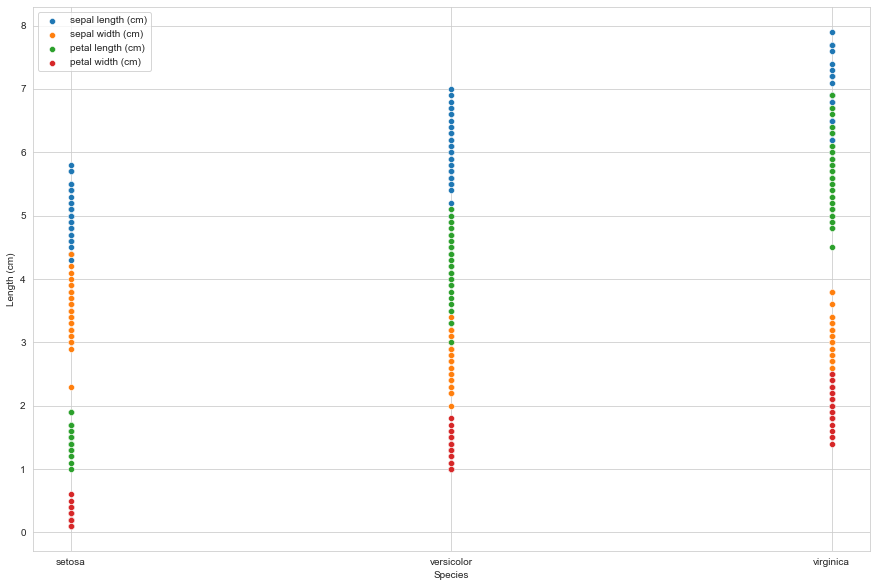

In [11]:
plt.figure(figsize=[15,10])
sns.scatterplot(data=df, x="species", y="sepal length (cm)")
sns.scatterplot(data=df, x="species", y="sepal width (cm)")
sns.scatterplot(data=df, x="species", y="petal length (cm)")
sns.scatterplot(data=df, x="species", y="petal width (cm)")
plt.ylabel("Length (cm)")
plt.xlabel("Species")
plt.legend(df)

Text(0, 0.5, 'Length (cm)')

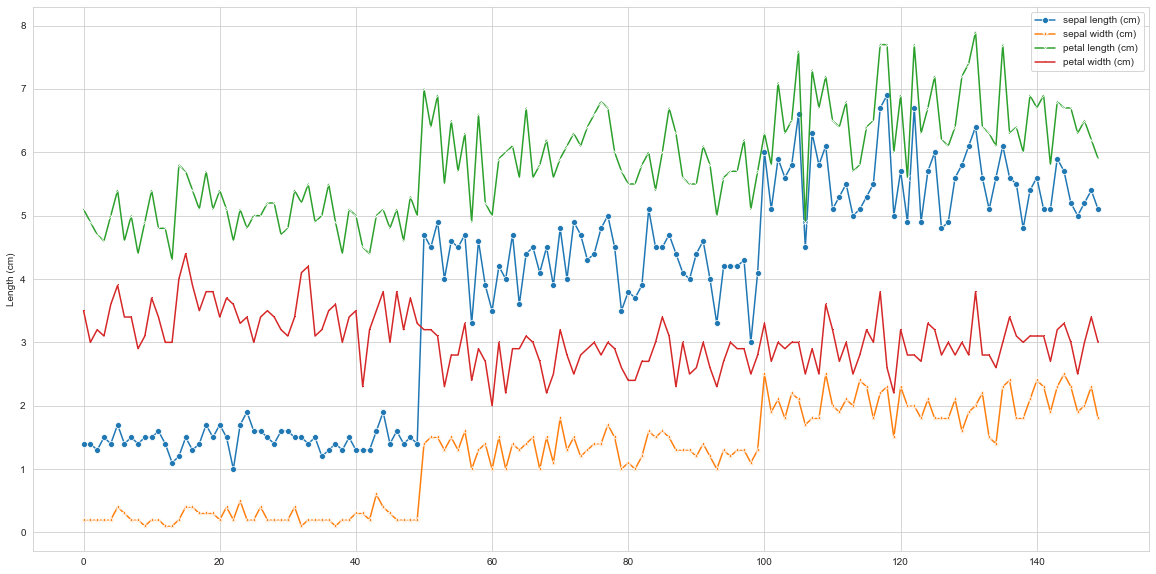

In [12]:
plt.figure(figsize=[20,10])
sns.lineplot(x=range(0,150), y=df["petal length (cm)"],marker="o")
sns.lineplot(x=range(0,150), y=df["petal width (cm)"],marker="*")
sns.lineplot(x=range(0,150), y=df["sepal length (cm)"],marker="x")
sns.lineplot(x=range(0,150), y=df["sepal width (cm)"],marker=",")
plt.legend(df)
plt.ylabel("Length (cm)")

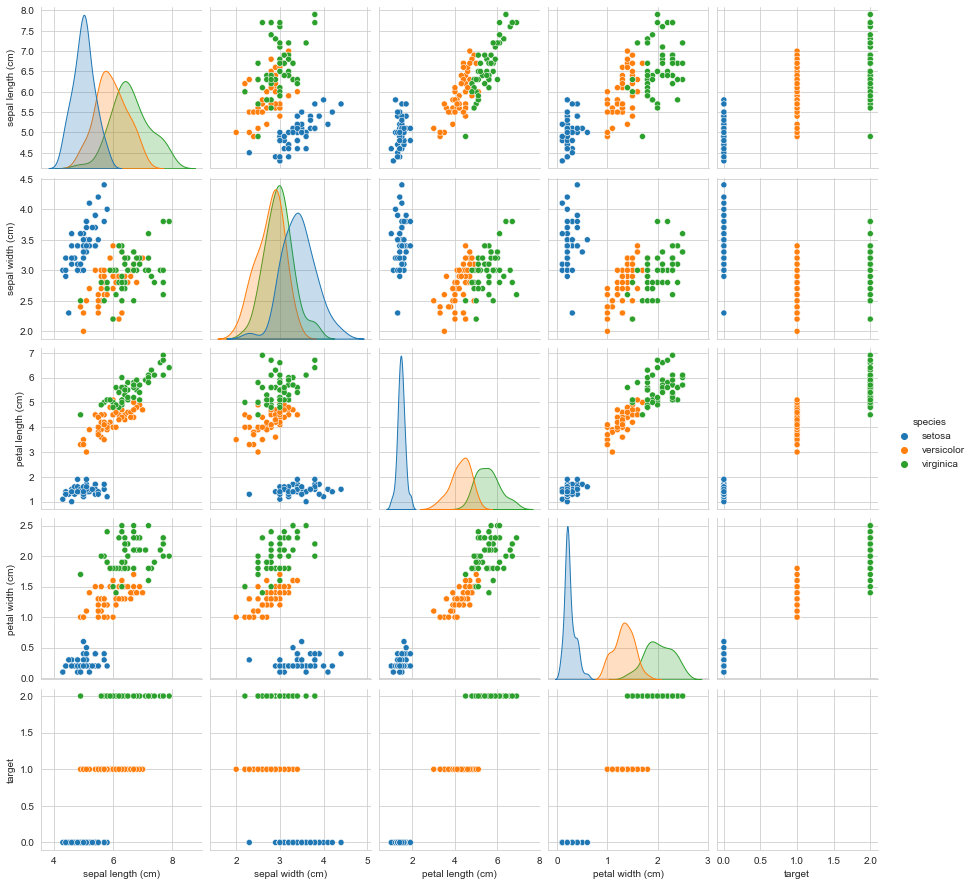

In [13]:
sns.pairplot(df,hue="species")

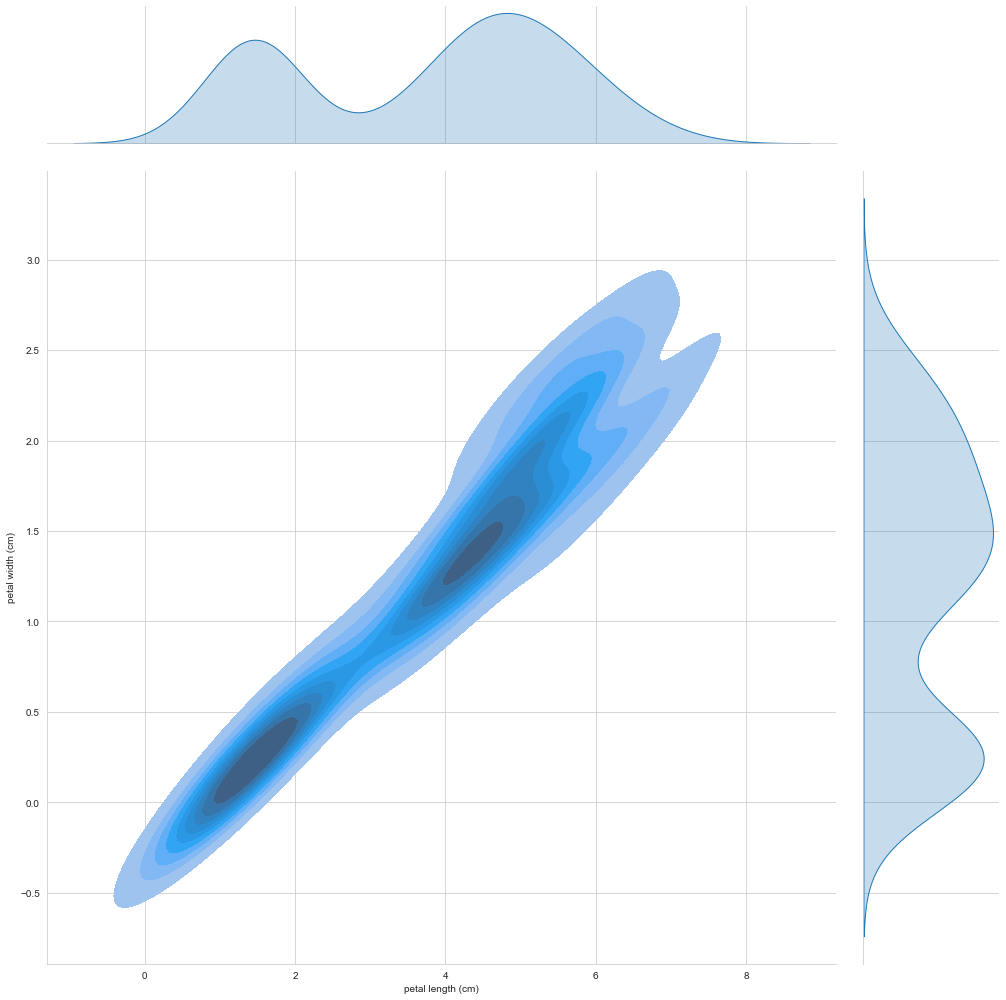

In [14]:
sns.jointplot(height= 14, data=df, x=df["petal length (cm)"],y=df["petal width (cm)"], kind="kde", fill=True)

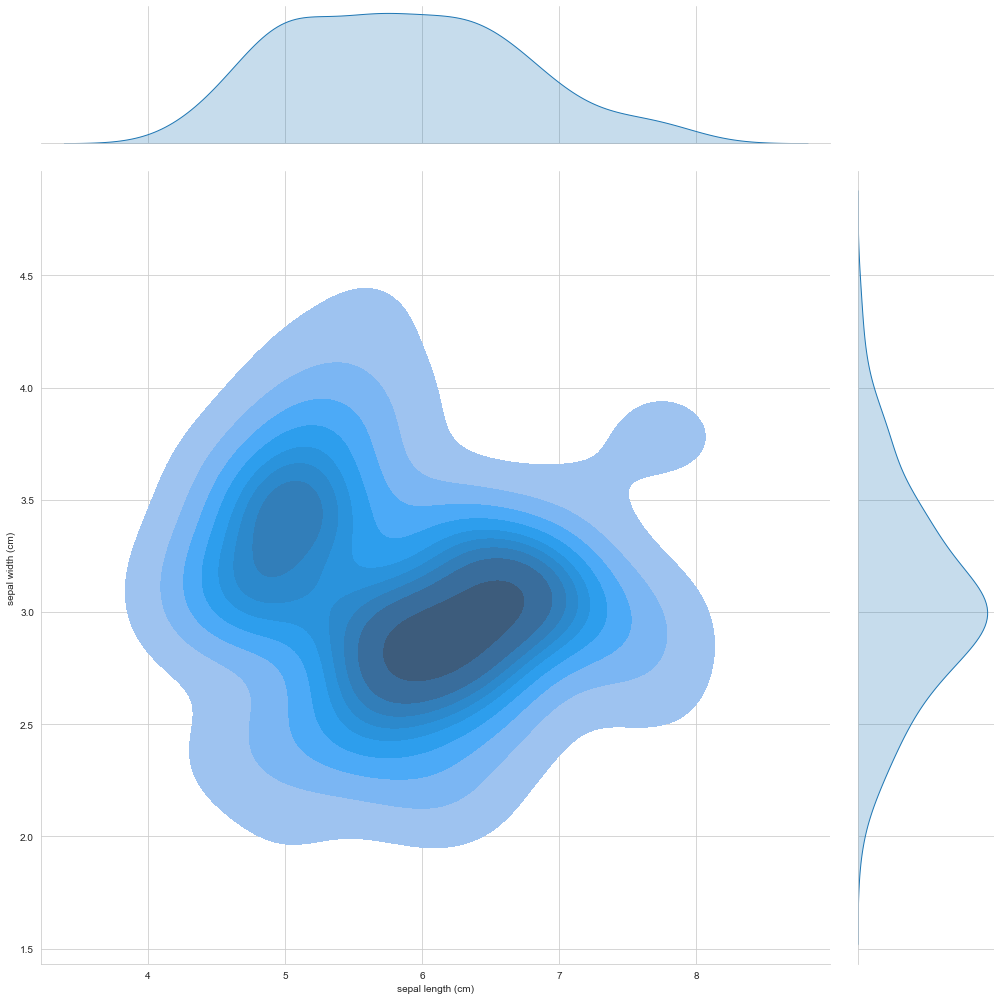

In [15]:
sns.jointplot(height= 14, data=df, x=df["sepal length (cm)"],y=df["sepal width (cm)"], kind="kde", fill=True)

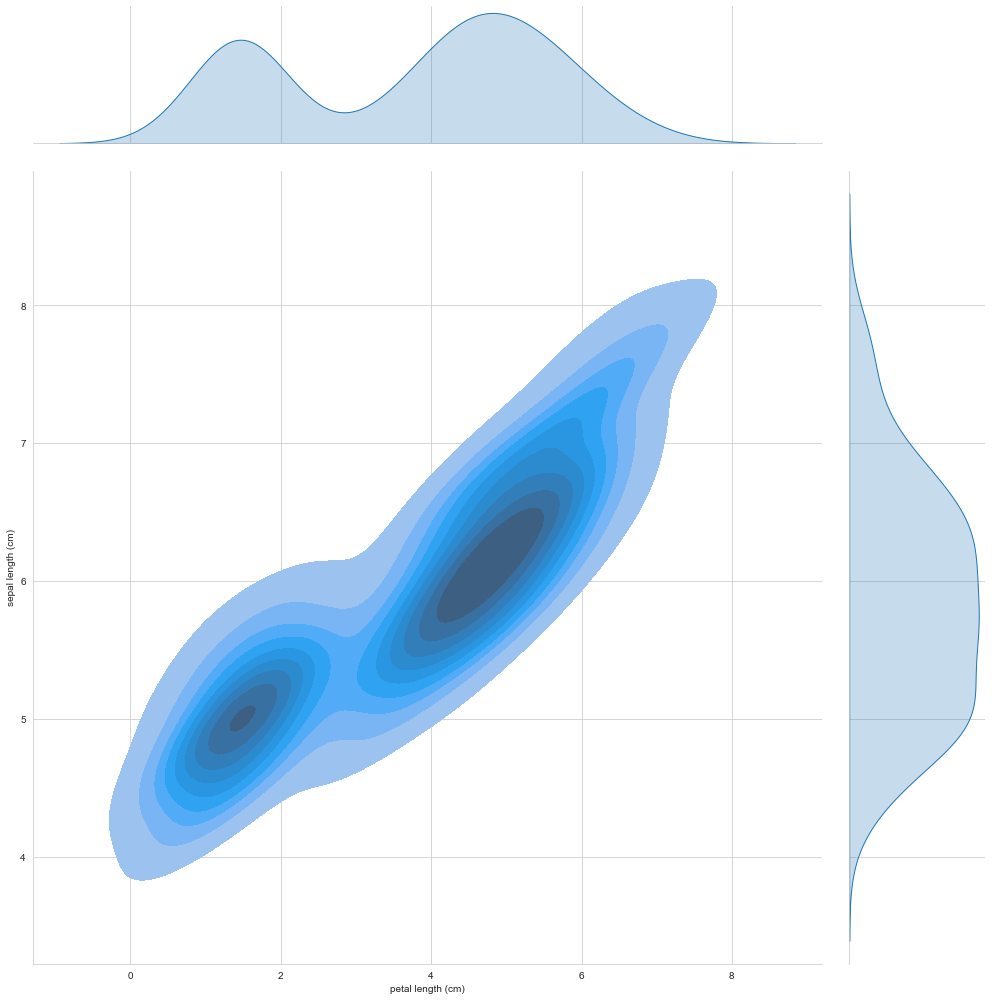

In [16]:
sns.jointplot(height= 14, data=df, x=df["petal length (cm)"],y=df["sepal length (cm)"], kind="kde", fill=True)

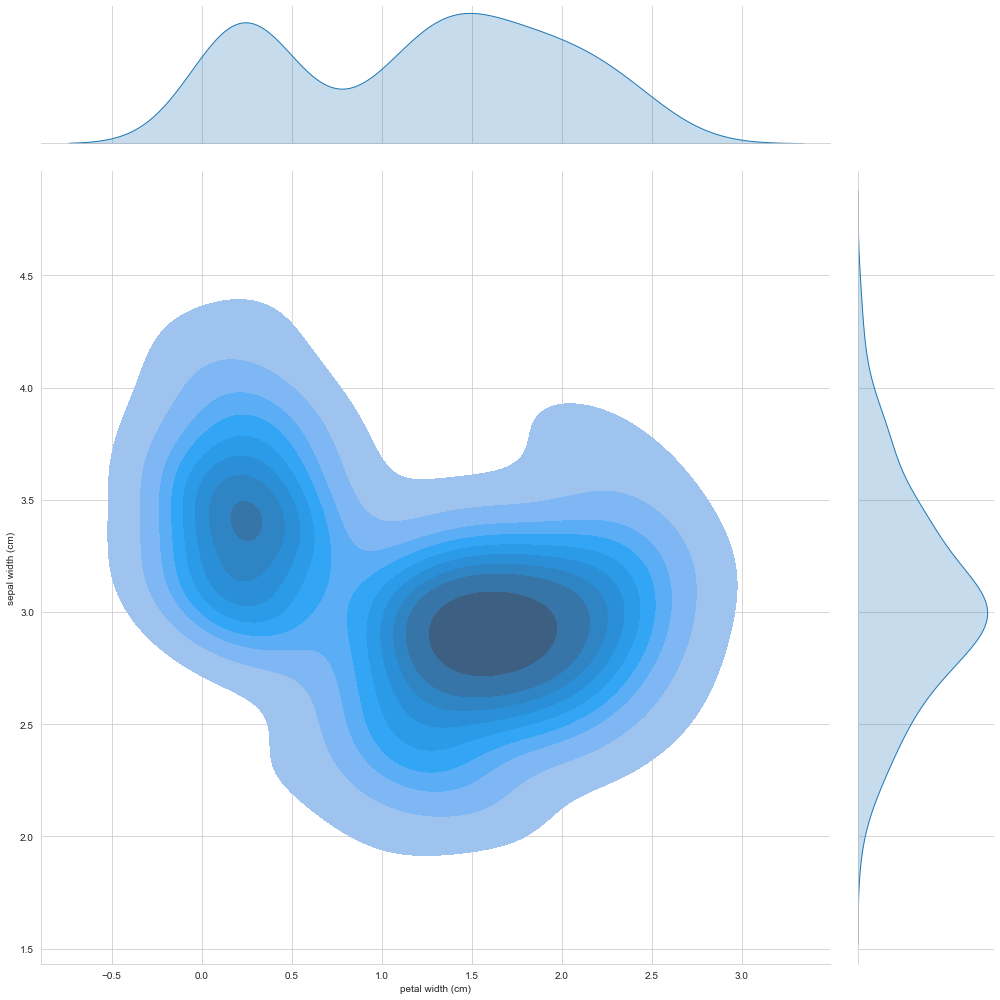

In [17]:
sns.jointplot(height= 14, data=df, x=df["petal width (cm)"],y=df["sepal width (cm)"], kind="kde", fill=True)

## Machine Learning

Establish model to classify species.

In [18]:
from sklearn.model_selection import train_test_split
X = df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [19]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
69,5.6,2.5,3.9,1.1
23,5.1,3.3,1.7,0.5
101,5.8,2.7,5.1,1.9
4,5.0,3.6,1.4,0.2
57,4.9,2.4,3.3,1.0


In [20]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4


In [21]:
y_train.head()

69     versicolor
23         setosa
101     virginica
4          setosa
57     versicolor
Name: species, dtype: object

In [22]:
y_test.head()

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
Name: species, dtype: object

## KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(confusion_matrix(y_test,pred))

[[15  0  0]
 [ 0 22  0]
 [ 0  0 13]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        22
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [29]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

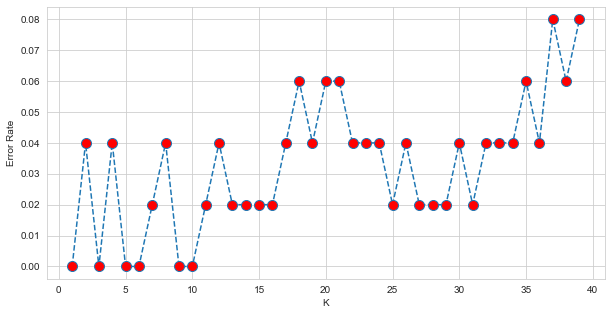

In [30]:
plt.figure(figsize = (10,5))
plt.plot(range(1,40),error_rate, linestyle="--", marker="o", markerfacecolor="red", markersize=10)
plt.xlabel("K")
plt.ylabel("Error Rate")

n_neighbors = 1 is accurate

## Test the model on field data!

In [42]:
X_field = np.array([[6.4, 2.87, 4.9, 1]])
prediction = knn.predict(X_field)
print(prediction)

['versicolor']
